# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Gandham Heamanth Rao`

Roll Number: `20CS10027`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [100]:
import torch
import torch.nn as nn
import random
import numpy as np
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

## Add any other imports here

In [101]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [102]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [103]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(in_features=128, out_features=10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.out(x)
        return x
A = Net1()


### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [104]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=128, out_features=256)
        self.relu3 = nn.ReLU()
        self.out = nn.Linear(in_features=256, out_features=10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.out(x)
        return x
B = Net2()

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [105]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=128, out_features=256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(in_features=256, out_features=512)
        self.relu4 = nn.ReLU()
        self.out = nn.Linear(in_features=512, out_features=10)

    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.out(x)
        return x
C = Net3()

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [106]:
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(A.parameters(), lr=0.001)
optimizer2 = optim.Adam(B.parameters(), lr=0.001)
optimizer3 = optim.Adam(C.parameters(), lr=0.001)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [107]:
lr = 0.01  #learning rate
ne = 10   #number of epochs

### Model A 



In [108]:
# Training Loop for model A

train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(ne):
    train_loss_batch = []
    train_acc_batch = []
    val_loss_batch = []
    val_acc_batch = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = A(inputs.view(-1,784))
        loss = criterion(outputs, labels)
        _,outputs = torch.max(outputs,dim = 1)
        loss.backward()
        optimizer1.step()

        # print statistics
        train_loss_batch.append(loss.item())
        train_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    train_loss.append(sum(train_loss_batch)/len(train_loss_batch))
    train_acc.append(sum(train_acc_batch)/len(train_acc_batch))

    with torch.no_grad():
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            outputs = A(inputs.view(-1,784))
            loss = criterion(outputs, labels)
            _,outputs = torch.max(outputs, dim = 1)
            val_loss_batch.append(loss.item())
            val_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    val_loss.append(sum(val_loss_batch)/len(val_loss_batch))
    val_acc.append(sum(val_acc_batch)/len(val_acc_batch))

    print('Epoch [%d], train_loss: %.3f,train_acc: %.3f,val_loss: %.3f,val_acc: %.3f' % (epoch+1,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))



Epoch [1], train_loss: 0.394,train_acc: 0.889,val_loss: 0.208,val_acc: 0.941
Epoch [2], train_loss: 0.182,train_acc: 0.946,val_loss: 0.133,val_acc: 0.961
Epoch [3], train_loss: 0.129,train_acc: 0.961,val_loss: 0.099,val_acc: 0.970
Epoch [4], train_loss: 0.100,train_acc: 0.969,val_loss: 0.078,val_acc: 0.976
Epoch [5], train_loss: 0.080,train_acc: 0.976,val_loss: 0.066,val_acc: 0.980
Epoch [6], train_loss: 0.066,train_acc: 0.979,val_loss: 0.050,val_acc: 0.985
Epoch [7], train_loss: 0.055,train_acc: 0.983,val_loss: 0.039,val_acc: 0.988
Epoch [8], train_loss: 0.047,train_acc: 0.985,val_loss: 0.042,val_acc: 0.986
Epoch [9], train_loss: 0.040,train_acc: 0.987,val_loss: 0.028,val_acc: 0.991
Epoch [10], train_loss: 0.034,train_acc: 0.989,val_loss: 0.023,val_acc: 0.993


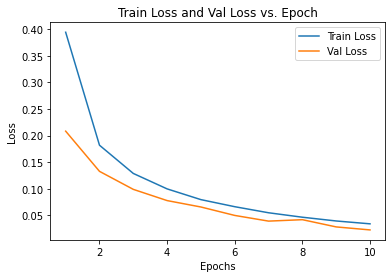

In [109]:

maxa = max(val_acc)


# Create a list of epoch numbers
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_loss, label='Train Loss')
plt.plot(epochsi, val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Val Loss vs. Epoch')
plt.legend()
plt.show()

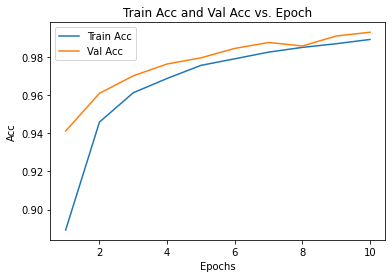

In [110]:
# Create a list of epoch numbers
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_acc, label='Train Acc')
plt.plot(epochsi, val_acc, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Train Acc and Val Acc vs. Epoch')
plt.legend()
plt.show()

### Model B


In [111]:
# Training Loop for model B
train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(ne):
    train_loss_batch = []
    train_acc_batch = []
    val_loss_batch = []
    val_acc_batch = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = B(inputs.view(-1,784))
        loss = criterion(outputs, labels)
        _,outputs = torch.max(outputs,dim = 1)
        loss.backward()
        optimizer2.step()

        # print statistics
        train_loss_batch.append(loss.item())
        train_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    train_loss.append(sum(train_loss_batch)/len(train_loss_batch))
    train_acc.append(sum(train_acc_batch)/len(train_acc_batch))

    with torch.no_grad():
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            outputs = B(inputs.view(-1,784))
            loss = criterion(outputs, labels)
            _,outputs = torch.max(outputs, dim = 1)
            val_loss_batch.append(loss.item())
            val_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    val_loss.append(sum(val_loss_batch)/len(val_loss_batch))
    val_acc.append(sum(val_acc_batch)/len(val_acc_batch))

    print('Epoch [%d], train_loss: %.3f,train_acc: %.3f,val_loss: %.3f,val_acc: %.3f' % (epoch+1,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))

Epoch [1], train_loss: 0.360,train_acc: 0.894,val_loss: 0.181,val_acc: 0.944
Epoch [2], train_loss: 0.146,train_acc: 0.956,val_loss: 0.122,val_acc: 0.963
Epoch [3], train_loss: 0.104,train_acc: 0.968,val_loss: 0.072,val_acc: 0.978
Epoch [4], train_loss: 0.083,train_acc: 0.974,val_loss: 0.065,val_acc: 0.979
Epoch [5], train_loss: 0.066,train_acc: 0.979,val_loss: 0.049,val_acc: 0.985
Epoch [6], train_loss: 0.055,train_acc: 0.982,val_loss: 0.051,val_acc: 0.984
Epoch [7], train_loss: 0.047,train_acc: 0.984,val_loss: 0.034,val_acc: 0.989
Epoch [8], train_loss: 0.041,train_acc: 0.986,val_loss: 0.037,val_acc: 0.987
Epoch [9], train_loss: 0.035,train_acc: 0.989,val_loss: 0.038,val_acc: 0.986
Epoch [10], train_loss: 0.030,train_acc: 0.990,val_loss: 0.022,val_acc: 0.992


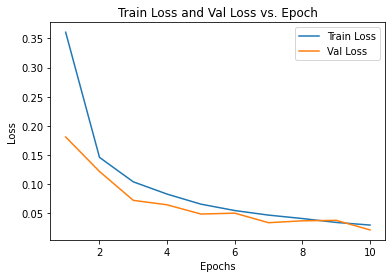

In [112]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B

maxb = max(val_acc)


# Create a list of epoch numbers
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_loss, label='Train Loss')
plt.plot(epochsi, val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Val Loss vs. Epoch')
plt.legend()
plt.show()

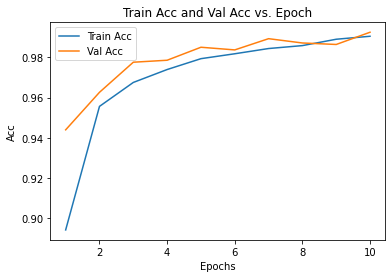

In [113]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_acc, label='Train Acc')
plt.plot(epochsi, val_acc, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Train Acc and Val Acc vs. Epoch')
plt.legend()
plt.show()




### Model C


In [114]:
# Training Loop for model C
# Training Loop for model B
train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(ne):
    train_loss_batch = []
    train_acc_batch = []
    val_loss_batch = []
    val_acc_batch = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer3.zero_grad()

        # forward + backward + optimize
        outputs = C(inputs.view(-1,784))
        loss = criterion(outputs, labels)
        _,outputs = torch.max(outputs,dim = 1)
        loss.backward()
        optimizer3.step()

        # print statistics
        train_loss_batch.append(loss.item())
        train_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    train_loss.append(sum(train_loss_batch)/len(train_loss_batch))
    train_acc.append(sum(train_acc_batch)/len(train_acc_batch))

    with torch.no_grad():
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            outputs = C(inputs.view(-1,784))
            loss = criterion(outputs, labels)
            _,outputs = torch.max(outputs, dim = 1)
            val_loss_batch.append(loss.item())
            val_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    val_loss.append(sum(val_loss_batch)/len(val_loss_batch))
    val_acc.append(sum(val_acc_batch)/len(val_acc_batch))

    print('Epoch [%d], train_loss: %.3f,train_acc: %.3f,val_loss: %.3f,val_acc: %.3f' % (epoch+1,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))

Epoch [1], train_loss: 0.349,train_acc: 0.892,val_loss: 0.153,val_acc: 0.954
Epoch [2], train_loss: 0.139,train_acc: 0.958,val_loss: 0.095,val_acc: 0.971
Epoch [3], train_loss: 0.106,train_acc: 0.967,val_loss: 0.085,val_acc: 0.974
Epoch [4], train_loss: 0.082,train_acc: 0.975,val_loss: 0.070,val_acc: 0.980
Epoch [5], train_loss: 0.069,train_acc: 0.979,val_loss: 0.050,val_acc: 0.984
Epoch [6], train_loss: 0.059,train_acc: 0.982,val_loss: 0.043,val_acc: 0.986
Epoch [7], train_loss: 0.051,train_acc: 0.984,val_loss: 0.049,val_acc: 0.984
Epoch [8], train_loss: 0.049,train_acc: 0.985,val_loss: 0.030,val_acc: 0.991
Epoch [9], train_loss: 0.040,train_acc: 0.987,val_loss: 0.035,val_acc: 0.989
Epoch [10], train_loss: 0.038,train_acc: 0.988,val_loss: 0.031,val_acc: 0.990


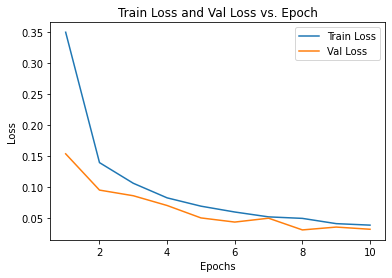

In [115]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
# Create a list of epoch numbers
maxc = max(val_acc)
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_loss, label='Train Loss')
plt.plot(epochsi, val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Val Loss vs. Epoch')
plt.legend()
plt.show()

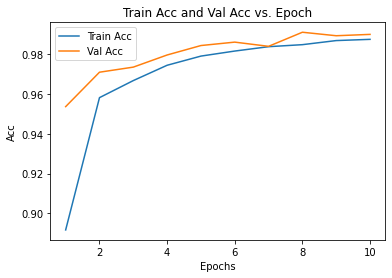

In [116]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
epochsi = [1,2,3,4,5,6,7,8,9,10]

# Plot Train Loss and Val Loss vs. Epoch
plt.plot(epochsi, train_acc, label='Train Acc')
plt.plot(epochsi, val_acc, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Train Acc and Val Acc vs. Epoch')
plt.legend()
plt.show()


## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [117]:
from re import L
# Leaky ReLU model definiton

# Leaky ReLU model definiton




class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)  # input layer to hidden layer 1
        self.lrelu1 = nn.LeakyReLU()  # Leaky ReLU activation function
        self.fc2 = nn.Linear(in_features=64, out_features=128)  # hidden layer 1 to hidden layer 2
        self.lrelu2 = nn.LeakyReLU()  # Leaky ReLU activation function
        self.out = nn.Linear(in_features=128, out_features=10)  # hidden layer 2 to output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.lrelu1(x)
        x = self.fc2(x)
        x = self.lrelu2(x)
        x = self.out(x)
        return x



import torch.nn as nn

class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)  # input layer to hidden layer 1
        self.tanh1 = nn.Tanh()  # Tanh activation function
        self.fc2 = nn.Linear(in_features=64, out_features=128)  # hidden layer 1 to hidden layer 2
        self.tanh2 = nn.Tanh()  # Tanh activation function
        self.out = nn.Linear(in_features=128, out_features=10)  # hidden layer 2 to output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh1(x)
        x = self.fc2(x)
        x = self.tanh2(x)
        x = self.out(x)
        return x

 

L = Net4()

T = Net5()

optimizer4 = torch.optim.Adam(L.parameters(), lr=0.01)

optimizer5 = torch.optim.Adam(T.parameters(), lr=0.01)



tensor(0.9931)
tensor(0.9925)
tensor(0.9911)


AttributeError: ignored

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [ ]:
# Training Loop for LRELU
print("A is Best")
train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(ne):
    train_loss_batch = []
    train_acc_batch = []
    val_loss_batch = []
    val_acc_batch = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer4.zero_grad()

        # forward + backward + optimize
        outputs = L(inputs.view(-1,784))
        loss = criterion(outputs, labels)
        _,outputs = torch.max(outputs,dim = 1)
        loss.backward()
        optimizer4.step()

        # print statistics
        train_loss_batch.append(loss.item())
        train_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    train_loss.append(sum(train_loss_batch)/len(train_loss_batch))
    train_acc.append(sum(train_acc_batch)/len(train_acc_batch))

    with torch.no_grad():
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            outputs = L(inputs.view(-1,784))
            loss = criterion(outputs, labels)
            _,outputs = torch.max(outputs, dim = 1)
            val_loss_batch.append(loss.item())
            val_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    val_loss.append(sum(val_loss_batch)/len(val_loss_batch))
    val_acc.append(sum(val_acc_batch)/len(val_acc_batch))

    print('Epoch [%d], train_loss: %.3f,train_acc: %.3f,val_loss: %.3f,val_acc: %.3f' % (epoch+1,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))
train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(ne):
    train_loss_batch = []
    train_acc_batch = []
    val_loss_batch = []
    val_acc_batch = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer5.zero_grad()

        # forward + backward + optimize
        outputs = T(inputs.view(-1,784))
        loss = criterion(outputs, labels)
        _,outputs = torch.max(outputs,dim = 1)
        loss.backward()
        optimizer5.step()

        # print statistics
        train_loss_batch.append(loss.item())
        train_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    train_loss.append(sum(train_loss_batch)/len(train_loss_batch))
    train_acc.append(sum(train_acc_batch)/len(train_acc_batch))

    with torch.no_grad():
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            outputs = T(inputs.view(-1,784))
            loss = criterion(outputs, labels)
            _,outputs = torch.max(outputs, dim = 1)
            val_loss_batch.append(loss.item())
            val_acc_batch.append(torch.sum(outputs==labels)/len(outputs))
    val_loss.append(sum(val_loss_batch)/len(val_loss_batch))
    val_acc.append(sum(val_acc_batch)/len(val_acc_batch))

    print('Epoch [%d], train_loss: %.3f,train_acc: %.3f,val_loss: %.3f,val_acc: %.3f' % (epoch+1,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))

In [ ]:
# Training Loop for TanH

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [ ]:
# Define how to calculate Accuracy on Test Set

In [ ]:
# Accuracy of RELU model

In [ ]:
# Accuracy of TanH model

In [ ]:
# Accuracy of LeakyReLU model

Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `....` %
* TanH model Test Set Accuracy: `....` %
* LeakReLU model Test Set Accuracy: `....` %